In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report
import os

In [ ]:
df = pd.read_csv("data/Crop_recommendation.csv")
df.head()

/content


In [ ]:
df.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9795454545454545
Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      

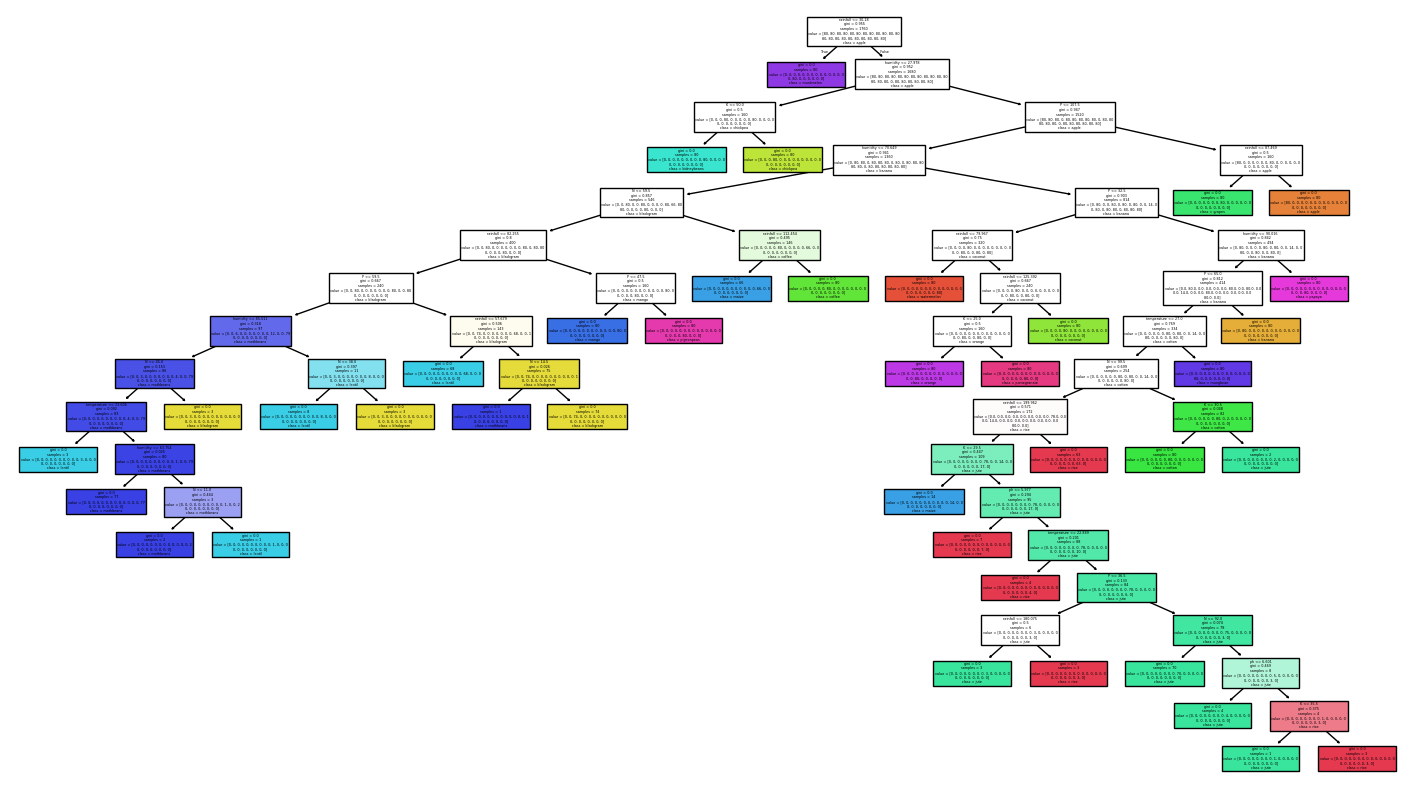

In [ ]:
plt.figure(figsize=(18,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=dt_model.classes_)
plt.show()

In [ ]:
print(export_text(dt_model, feature_names=list(X.columns)))

|--- rainfall <= 30.18
|   |--- class: muskmelon
|--- rainfall >  30.18
|   |--- humidity <= 27.98
|   |   |--- K <= 50.00
|   |   |   |--- class: kidneybeans
|   |   |--- K >  50.00
|   |   |   |--- class: chickpea
|   |--- humidity >  27.98
|   |   |--- P <= 107.50
|   |   |   |--- humidity <= 70.65
|   |   |   |   |--- N <= 59.50
|   |   |   |   |   |--- rainfall <= 82.25
|   |   |   |   |   |   |--- P <= 59.50
|   |   |   |   |   |   |   |--- humidity <= 65.01
|   |   |   |   |   |   |   |   |--- N <= 45.00
|   |   |   |   |   |   |   |   |   |--- temperature <= 23.61
|   |   |   |   |   |   |   |   |   |   |--- class: lentil
|   |   |   |   |   |   |   |   |   |--- temperature >  23.61
|   |   |   |   |   |   |   |   |   |   |--- humidity <= 63.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: mothbeans
|   |   |   |   |   |   |   |   |   |   |--- humidity >  63.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |  

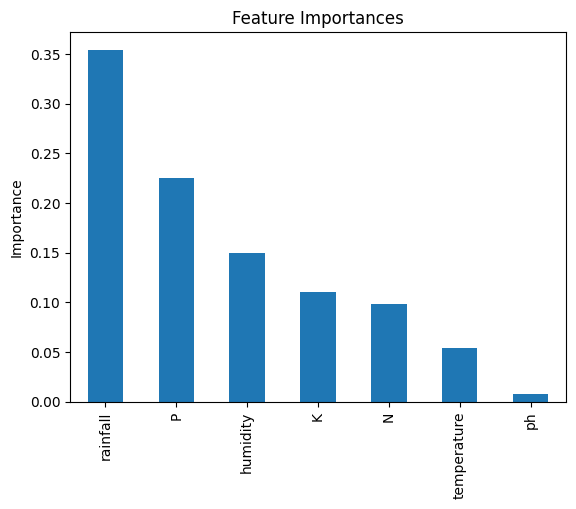

Feature Importances:
rainfall       0.354324
P              0.224962
humidity       0.149258
K              0.110846
N              0.098830
temperature    0.054377
ph             0.007404
dtype: float64


In [ ]:
feature_importances = dt_model.feature_importances_

# Create a pandas Series for better visualization
features_df = pd.Series(feature_importances, index=X.columns)

# Sort the features by importance and plot
features_df.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

# Print the sorted feature importances
print("Feature Importances:")
print(features_df.sort_values(ascending=False))


In [ ]:
class Node:
    def __init__(self, condition=None, class_name=None):
        self.condition = condition  # Kondisi split (misal: 'rainfall <= 30.18')
        self.right = None            # Subtree untuk kondisi True
        self.left = None           # Subtree untuk kondisi False
        self.class_name = class_name  # Hanya ada di leaf node

def build_decision_tree():
    # Membangun decision tree sesuai dengan struktur yang diberikan
    root = Node('rainfall <= 30.18')

    # right subtree (rainfall <= 30.18)
    root.right = Node(class_name='muskmelon')

    # left subtree (rainfall > 30.18)
    root.left = Node('humidity <= 27.98')

    # Subtree humidity <= 27.98
    root.left.right = Node('K <= 50.00')
    root.left.right.right = Node(class_name='kidneybeans')
    root.left.right.left = Node(class_name='chickpea')

    # Subtree humidity > 27.98
    root.left.left = Node('P <= 107.50')

    # Subtree P <= 107.50
    root.left.left.right = Node('humidity <= 70.65')

    # Subtree humidity <= 70.65
    root.left.left.right.right = Node('N <= 59.50')

    # Subtree N <= 59.50
    root.left.left.right.right.right = Node('rainfall <= 82.25')

    # Subtree rainfall <= 82.25
    root.left.left.right.right.right.right = Node('P <= 59.50')

    # Subtree P <= 59.50
    root.left.left.right.right.right.right.right = Node('humidity <= 65.01')

    # Subtree humidity <= 65.01
    root.left.left.right.right.right.right.right.right = Node('N <= 45.00')
    root.left.left.right.right.right.right.right.right.right = Node('righterature <= 23.61')
    root.left.left.right.right.right.right.right.right.right.right = Node(class_name='lentil')
    root.left.left.right.right.right.right.right.right.right.left = Node('humidity <= 63.75')
    root.left.left.right.right.right.right.right.right.right.left.right = Node(class_name='mothbeans')
    root.left.left.right.right.right.right.right.right.right.left.left = Node(class_name='blackgram')

    # Subtree N > 45.00
    root.left.left.right.right.right.right.right.right.left = Node(class_name='blackgram')

    # Subtree humidity > 65.01
    root.left.left.right.right.right.right.right.left = Node('N <= 38.00')
    root.left.left.right.right.right.right.right.left.right = Node(class_name='lentil')
    root.left.left.right.right.right.right.right.left.left = Node(class_name='blackgram')

    # Subtree P > 59.50
    root.left.left.right.right.right.right.left = Node('rainfall <= 57.68')
    root.left.left.right.right.right.right.left.right = Node(class_name='lentil')
    root.left.left.right.right.right.right.left.left = Node('N <= 14.50')
    root.left.left.right.right.right.right.left.left.right = Node(class_name='mothbeans')
    root.left.left.right.right.right.right.left.left.left = Node(class_name='blackgram')

    # Subtree rainfall > 82.25
    root.left.left.right.right.right.left = Node('P <= 47.50')
    root.left.left.right.right.right.left.right = Node(class_name='mango')
    root.left.left.right.right.right.left.left = Node(class_name='pigeonpeas')

    # Subtree N > 59.50
    root.left.left.right.right.left = Node('rainfall <= 112.45')
    root.left.left.right.right.left.right = Node(class_name='maize')
    root.left.left.right.right.left.left = Node(class_name='coffee')

    # Subtree humidity > 70.65
    root.left.left.right.left = Node('P <= 32.50')
    root.left.left.right.left.right = Node('rainfall <= 79.97')
    root.left.left.right.left.right.right = Node(class_name='watermelon')
    root.left.left.right.left.right.left = Node('rainfall <= 125.39')
    root.left.left.right.left.right.left.right = Node('K <= 25.00')
    root.left.left.right.left.right.left.right.right = Node(class_name='orange')
    root.left.left.right.left.right.left.right.left = Node(class_name='pomegranate')
    root.left.left.right.left.right.left.left = Node(class_name='coconut')

    # Subtree P > 32.50
    root.left.left.right.left.left = Node('humidity <= 90.02')
    root.left.left.right.left.left.right = Node('P <= 65.00')
    root.left.left.right.left.left.right.right = Node('righterature <= 27.00')
    root.left.left.right.left.left.right.right.right = Node('N <= 99.50')
    root.left.left.right.left.left.right.right.right.right = Node('rainfall <= 199.96')
    root.left.left.right.left.left.right.right.right.right.right = Node('K <= 29.50')
    root.left.left.right.left.left.right.right.right.right.right.right = Node(class_name='maize')
    root.left.left.right.left.left.right.right.right.right.right.left = Node(class_name='rice')
    root.left.left.right.left.left.right.right.right.right.left = Node(class_name='rice')
    root.left.left.right.left.left.right.right.right.left = Node('K <= 30.50')
    root.left.left.right.left.left.right.right.right.left.right = Node(class_name='cotton')
    root.left.left.right.left.left.right.right.right.left.left = Node(class_name='jute')
    root.left.left.right.left.left.right.right.left = Node(class_name='mungbean')
    root.left.left.right.left.left.right.left = Node(class_name='banana')
    root.left.left.right.left.left.left = Node(class_name='papaya')

    # Subtree P > 107.50
    root.left.left.left = Node('rainfall <= 87.47')
    root.left.left.left.right = Node(class_name='grapes')
    root.left.left.left.left = Node(class_name='apple')

    return root

In [ ]:
def evaluate_condition(condition, input_values):
    # Mengevaluasi kondisi berdasarkan input pengguna
    var, op, val = condition.split()
    var = var.strip()    # Menghapus spasi di nama variabel
    op = op.strip()      # Menghapus spasi di operator
    val = float(val)     # Mengubah string nilai menjadi angka float

    input_val = input_values.get(var, 0)  # Mengambil nilai dari dictionary input_values
                                      # Jika tidak ada, defaultnya 0

    if op == '<=':
        return input_val <= val
    elif op == '>':
        return input_val > val
    else:
        raise ValueError(f"Operator tidak dikenal: {op}")




In [ ]:
def predict(node, input_values):
    if node.class_name is not None:
        return node.class_name

    if evaluate_condition(node.condition, input_values):
        return predict(node.right, input_values)  # Kondisi True -> right
    else:
        return predict(node.left, input_values)   # Kondisi False -> left


In [ ]:
def get_user_input():
    print("Masukkan nilai parameter berikut:")
    input_values = {}
    input_values['rainfall'] = float(input("Rainfall (mm): "))
    input_values['humidity'] = float(input("Humidity (%): "))
    input_values['temperature'] = float(input("Temperature (°C): "))
    input_values['N'] = float(input("Nitrogen (N) content: "))
    input_values['P'] = float(input("Phosphorus (P) content: "))
    input_values['K'] = float(input("Potassium (K) content: "))

    return input_values

In [ ]:
def main():
    print("Sistem Rekomendasi Tanaman Berdasarkan Kondisi Lingkungan")
    print("--------------------------------------------------------")

    # Membangun decision tree
    tree = build_decision_tree()

    # Mendapatkan input pengguna
    input_values = get_user_input()

    # Melakukan prediksi
    prediction = predict(tree, input_values)

    print("\nHasil Rekomendasi:")
    print(f"Tanaman yang cocok untuk kondisi tersebut adalah: {prediction}")

main()

Sistem Rekomendasi Tanaman Berdasarkan Kondisi Lingkungan
--------------------------------------------------------
Masukkan nilai parameter berikut:
Rainfall (mm): 50
Humidity (%): 50
Temperature (°C): 25
Nitrogen (N) content: 50
Phosphorus (P) content: 50
Potassium (K) content: 50

Hasil Rekomendasi:
Tanaman yang cocok untuk kondisi tersebut adalah: blackgram
